In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

/Users/jacobwhite/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('/Users/jacobwhite/DS-SF-36/in_class_assignments/dataset-13-walget-train.csv', encoding = 'latin', low_memory=False)

In [4]:
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,False,True,False,False,False,True,False,False,False,True,False,False,True
1,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Male,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Male,Home,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
4,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Female,Home,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6,Male,Apartment,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False
7,Male,Apartment,False,False,True,False,True,False,False,False,False,False,False,False,False,NaN,False,True
8,Female,Apartment,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,True
9,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [8]:
df.describe()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
count,542,594,594,593,590,599,594,594,591,594,589,595,591,588,588,592,597,600
unique,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Female,Home,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,301,295,549,516,502,533,512,582,582,558,569,538,525,550,510,528,519,300


In [9]:
df.head()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,False,True,False,False,False,True,False,False,False,True,False,False,True
1,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Male,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Male,Home,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
4,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.shape

(600, 18)

In [14]:
df.columns

Index(['AccountHolderImpliedGender', 'AccountHolderAddress',
       'RecentlyPurchasedPregnancyTest', 'RecentlyPurchasedBirthControl',
       'RecentlyPurchasedFeminineHygieneProducts',
       'RecentlyPurchasedFolicAcidSupplements',
       'RecentlyPurchasedPrenatalVitamins', 'RecentlyPurchasedPrenatalYogaDVD',
       'RecentlyPurchasedBodyPillow', 'RecentlyPurchasedGingerAle',
       'RecentlyPurchasedSeaBands',
       'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
       'RecentlyPurchasedCigarettes',
       'RecentlyPurchasedSmokingCessationProducts',
       'PurchasedWineRegularlyUntilRecentlyThenStopped',
       'RecentlyPurchasedWine', 'RecentlyPurchasedMaternityClothing',
       'IsPregnant'],
      dtype='object')

In [16]:
df.dtypes

AccountHolderImpliedGender                              object
AccountHolderAddress                                    object
RecentlyPurchasedPregnancyTest                          object
RecentlyPurchasedBirthControl                           object
RecentlyPurchasedFeminineHygieneProducts                object
RecentlyPurchasedFolicAcidSupplements                   object
RecentlyPurchasedPrenatalVitamins                       object
RecentlyPurchasedPrenatalYogaDVD                        object
RecentlyPurchasedBodyPillow                             object
RecentlyPurchasedGingerAle                              object
RecentlyPurchasedSeaBands                               object
PurchasedCigarettesRegularlyUntilRecentlyThenStopped    object
RecentlyPurchasedCigarettes                             object
RecentlyPurchasedSmokingCessationProducts               object
PurchasedWineRegularlyUntilRecentlyThenStopped          object
RecentlyPurchasedWine                                  

In [17]:
df.corr()

,IsPregnant
IsPregnant,1.0


In [18]:
df.cov()

,IsPregnant
IsPregnant,0.250417


In [19]:
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,False,True,False,False,False,True,False,False,False,True,False,False,True
1,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Male,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Male,Home,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
4,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Female,Home,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6,Male,Apartment,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False
7,Male,Apartment,False,False,True,False,True,False,False,False,False,False,False,False,False,NaN,False,True
8,Female,Apartment,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,True
9,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
AccountHolderImpliedGender                              542 non-null object
AccountHolderAddress                                    594 non-null object
RecentlyPurchasedPregnancyTest                          594 non-null object
RecentlyPurchasedBirthControl                           593 non-null object
RecentlyPurchasedFeminineHygieneProducts                590 non-null object
RecentlyPurchasedFolicAcidSupplements                   599 non-null object
RecentlyPurchasedPrenatalVitamins                       594 non-null object
RecentlyPurchasedPrenatalYogaDVD                        594 non-null object
RecentlyPurchasedBodyPillow                             591 non-null object
RecentlyPurchasedGingerAle                              594 non-null object
RecentlyPurchasedSeaBands                               589 non-null object
PurchasedCigarettesRegularlyUntilRecentlyThenStopped    595

In [21]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

AccountHolderImpliedGender                              58
AccountHolderAddress                                     6
RecentlyPurchasedPregnancyTest                           6
RecentlyPurchasedBirthControl                            7
RecentlyPurchasedFeminineHygieneProducts                10
RecentlyPurchasedFolicAcidSupplements                    1
RecentlyPurchasedPrenatalVitamins                        6
RecentlyPurchasedPrenatalYogaDVD                         6
RecentlyPurchasedBodyPillow                              9
RecentlyPurchasedGingerAle                               6
RecentlyPurchasedSeaBands                               11
PurchasedCigarettesRegularlyUntilRecentlyThenStopped     5
RecentlyPurchasedCigarettes                              9
RecentlyPurchasedSmokingCessationProducts               12
PurchasedWineRegularlyUntilRecentlyThenStopped          12
RecentlyPurchasedWine                                    8
RecentlyPurchasedMaternityClothing                      

In [22]:
df.IsPregnant.value_counts

<bound method IndexOpsMixin.value_counts of 0       True
1       True
2      False
3       True
4      False
5      False
6      False
7       True
8       True
9       True
10     False
11      True
12     False
13      True
14     False
15      True
16     False
17     False
18      True
19     False
20      True
21      True
22     False
23      True
24     False
25      True
26      True
27      True
28     False
29     False
30     False
31     False
32      True
33      True
34      True
35      True
36      True
37      True
38     False
39     False
40     False
41     False
42     False
43     False
44      True
45     False
46      True
47      True
48      True
49     False
50      True
51     False
52     False
53      True
54     False
55     False
56     False
57      True
58     False
59     False
60     False
61     False
62      True
63     False
64      True
65     False
66      True
67      True
68      True
69     False
70     False
71      True
72     False
73     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11569bcf8>]], dtype=object)

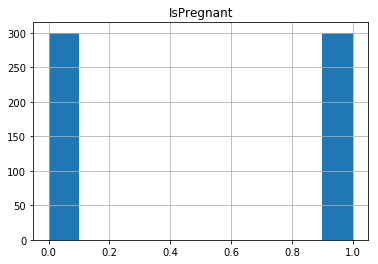

In [23]:
df.hist()

In [24]:
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,False,True,False,False,False,True,False,False,False,True,False,False,True
1,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Male,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Male,Home,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
4,Female,PO Box,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Female,Home,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6,Male,Apartment,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False
7,Male,Apartment,False,False,True,False,True,False,False,False,False,False,False,False,False,NaN,False,True
8,Female,Apartment,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,True
9,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [36]:
logr = LogisticRegression()

In [37]:
y = df[['IsPregnant']]

In [38]:
X = df.drop('IsPregnant', 1)

In [39]:
logr.fit(x,y)

ValueError: could not convert string to float: 'Home'